In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('results_patterns').getOrCreate()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading the results dataset
df = pd.read_csv("Datasets/gbt_results.csv")

In [20]:
# adding a column to show if model was correct or not
df['prediction'] = df['prediction'].astype(int)
df['correct'] = np.where(df['fire'] == df['prediction'], True, False)
df['correct numeric'] = np.where(df['fire'] == df['prediction'], 1, 0)
df.head()

,id1,id2,X,Y,month,day,FFMC,DMC,DC,ISI,...,rain,fire,month nominal,label,dayIndex,features,normFeatures,prediction,correct,correct numeric
0,4,5,8,6,aug,sun,92.3,85.3,488.0,14.7,...,0.0,0,8,0,0.0,"[8.0,6.0,92.3,8.0,0.0,85.3,488.0,14.7,22.2,29....","[0.010541573329819474,0.007906179997364605,0.1...",0,True,1
1,7,8,8,6,sep,tue,91.0,129.5,692.6,7.0,...,0.0,0,9,0,4.0,"[8.0,6.0,91.0,9.0,4.0,129.5,692.6,7.0,13.1,63....","[0.007777561734396266,0.0058331713007971995,0....",1,False,0
2,13,14,6,5,sep,wed,92.9,133.3,699.6,9.2,...,0.0,0,9,0,6.0,"[6.0,5.0,92.9,9.0,6.0,133.3,699.6,9.2,26.4,21....","[0.005923585743903642,0.004936321453253035,0.0...",0,True,1
3,19,22,7,4,jun,sun,94.3,96.3,200.0,8.4,...,0.0,0,6,0,0.0,"[7.0,4.0,94.3,6.0,0.0,96.3,200.0,8.4,21.0,44.0...","[0.014418125643666324,0.008238928939237899,0.1...",0,True,1
4,29,33,6,3,sep,sun,91.7,75.6,718.3,7.8,...,0.0,0,9,0,0.0,"[6.0,3.0,91.7,9.0,0.0,75.6,718.3,7.8,17.7,39.0...","[0.006174745291756716,0.003087372645878358,0.0...",0,True,1


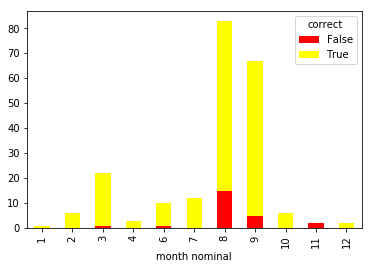

In [11]:
#Stacked bar graph for correct by month
month_bar = pd.crosstab(df['month nominal'], df['correct'])
month_bar.plot(kind='bar', stacked=True, color=['red', 'yellow'], grid=False)

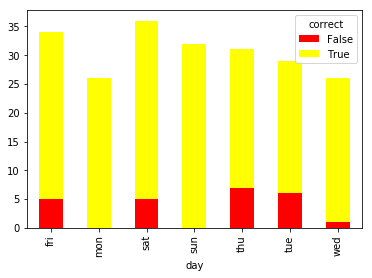

In [12]:
#Stacked bar graph for correct by day
month_bar = pd.crosstab(df['day'], df['correct'])
month_bar.plot(kind='bar', stacked=True, color=['red', 'yellow'], grid=False)

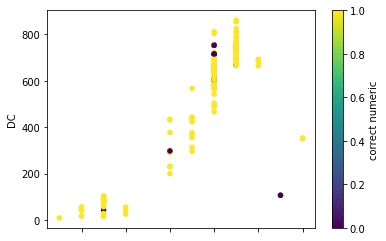

In [21]:
#scatter plot for month and DC by correct
df.plot.scatter(x='month nominal', y='DC', c='correct numeric', colormap='viridis')

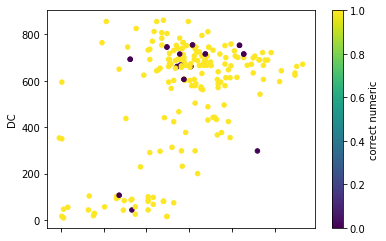

In [22]:
#scatter plot for month and DC by correct
df.plot.scatter(x='DMC', y='DC', c='correct numeric', colormap='viridis')

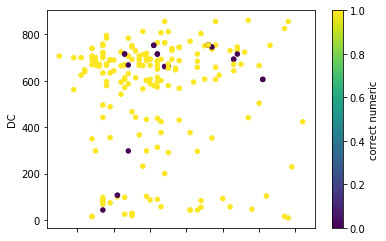

In [23]:
df.plot.scatter(x='RH', y='DC', c='correct numeric', colormap='viridis')

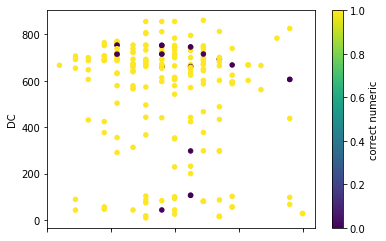

In [24]:
df.plot.scatter(x='wind', y='DC', c='correct numeric', colormap='viridis')

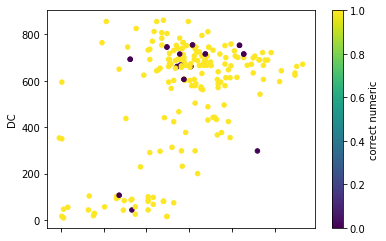

In [25]:
df.plot.scatter(x='temp', y='DC', c='correct numeric', colormap='viridis')

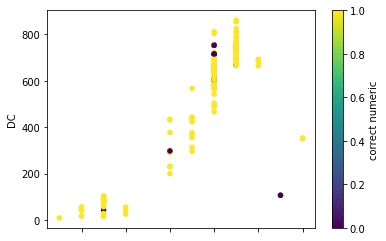

In [26]:
df.plot.scatter(x='month nominal', y='DC', c='correct numeric', colormap='viridis')

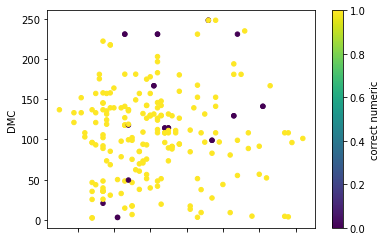

In [27]:
#DMC against RH, wind, temp, month nominal
df.plot.scatter(x='RH', y='DMC', c='correct numeric', colormap='viridis')

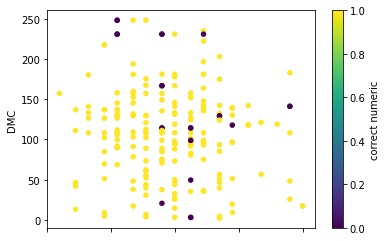

In [28]:
df.plot.scatter(x='wind', y='DMC', c='correct numeric', colormap='viridis')

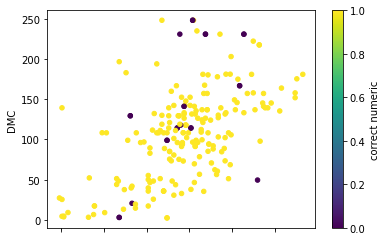

In [29]:
df.plot.scatter(x='temp', y='DMC', c='correct numeric', colormap='viridis')

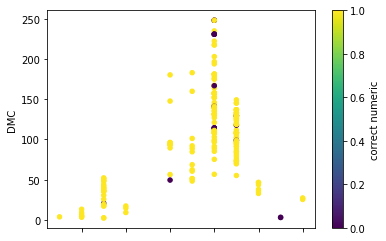

In [30]:
df.plot.scatter(x='month nominal', y='DMC', c='correct numeric', colormap='viridis')

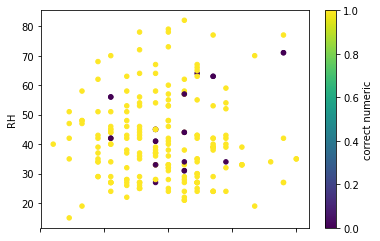

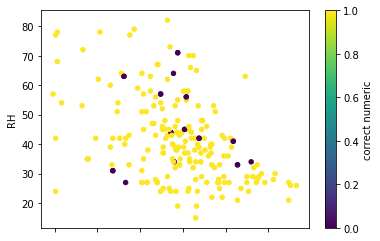

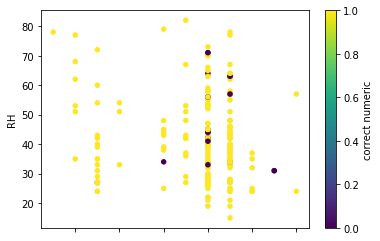

In [31]:
#RH against wind, temp, month nominal
df.plot.scatter(x='wind', y='RH', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='RH', c='correct numeric', colormap='viridis')
df.plot.scatter(x='month nominal', y='RH', c='correct numeric', colormap='viridis')

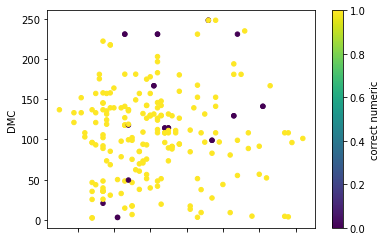

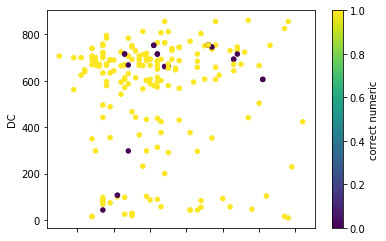

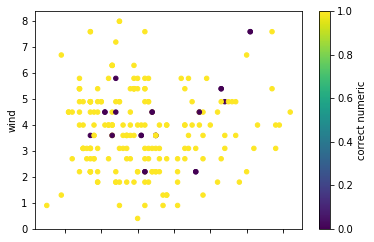

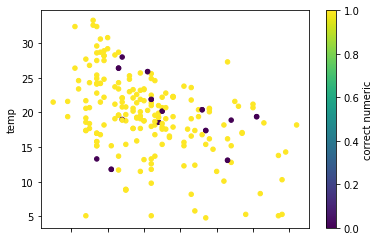

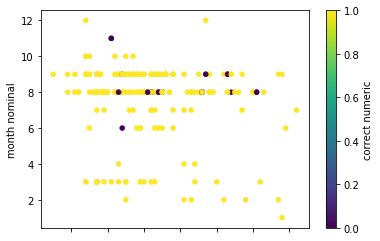

In [32]:
#RH against DMC, DC, wind, temp, month nominal

df.plot.scatter(x='RH', y='DMC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='RH', y='DC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='RH', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='RH', y='temp', c='correct numeric', colormap='viridis')
df.plot.scatter(x='RH', y='month nominal', c='correct numeric', colormap='viridis')

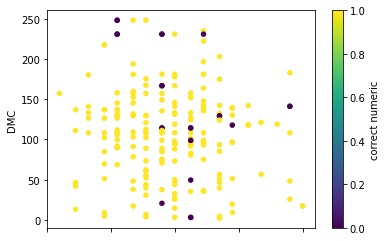

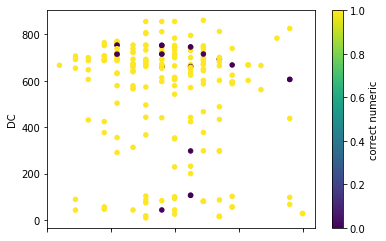

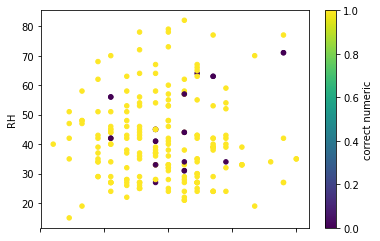

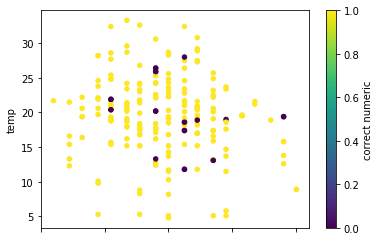

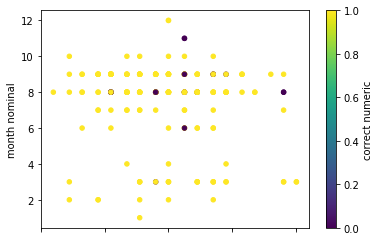

In [33]:
#wind against DMC, DC, RH, temp, month nominal

df.plot.scatter(x='wind', y='DMC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='wind', y='DC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='wind', y='RH', c='correct numeric', colormap='viridis')
df.plot.scatter(x='wind', y='temp', c='correct numeric', colormap='viridis')
df.plot.scatter(x='wind', y='month nominal', c='correct numeric', colormap='viridis')

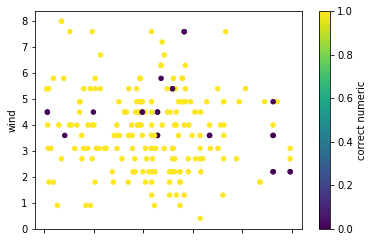

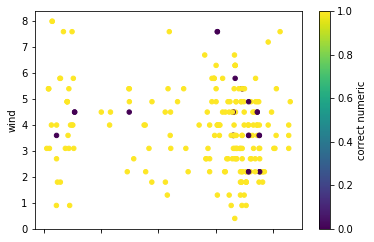

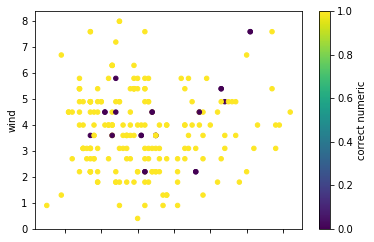

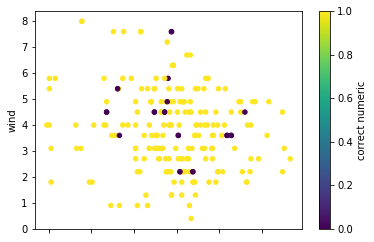

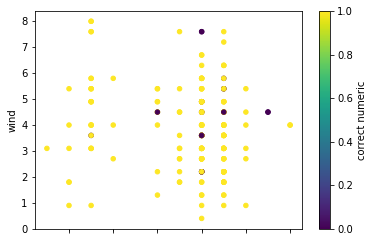

In [34]:
#wind against DMC, DC, RH, temp, month nominal

df.plot.scatter(x='DMC', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='DC', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='RH', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='month nominal', y='wind', c='correct numeric', colormap='viridis')

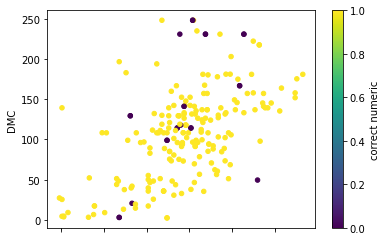

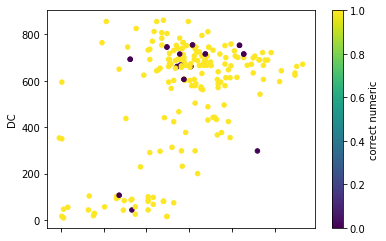

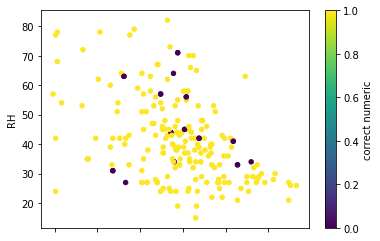

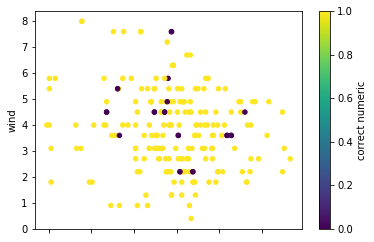

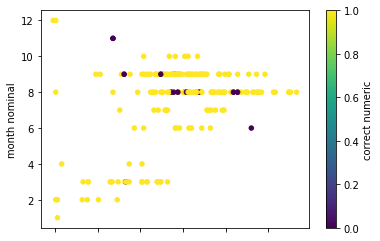

In [35]:
#temp against DMC, DC, RH, wind, month nominal

df.plot.scatter(x='temp', y='DMC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='DC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='RH', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='month nominal', c='correct numeric', colormap='viridis')